<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-SnapATAC-results" data-toc-modified-id="Read-SnapATAC-results-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read SnapATAC results</a></span></li><li><span><a href="#Get-cluster-level-profile" data-toc-modified-id="Get-cluster-level-profile-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get cluster level profile</a></span></li></ul></div>

In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# cemba_data package is here: https://github.com/lhqing/cemba_data
# ALLCools package is here: https://github.com/lhqing/ALLCools
from cemba_data.plot import *

## Read SnapATAC results

In [6]:
project_dir = '/home/hanliu/project/MOp_analysis_paper/'
project_dir = pathlib.Path(project_dir)

In [14]:
/cndd/Public_Datasets/BICCN/BICCN_minibrain_data/data_freeze/snmc_and_snatac/metadata/CEMBA_MOp.barcode.txt

In [25]:
atac_clustering_results = pd.read_csv(project_dir / 'metadata/atac/CEMBA_MOp.barcode.txt', 
                                      index_col=None, sep='\t')
atac_clustering_results['region'] = atac_clustering_results['sample'].apply(lambda i: i.split('_')[-1])

cluster_annotation = pd.read_csv('./cluster_annotation.txt', 
                                 sep='\t', index_col=0, squeeze=True)
atac_clustering_results['MajorCluster'] = atac_clustering_results['cluster'].map(cluster_annotation)
atac_clustering_results.columns = ['barcode', 'sample', 
                                   'TN', 'UM', 'PP', 'UQ', 'CM', 
                                   'tsne_0', 'tsne_1', 'cluster',
                                   'region', 'MajorCluster']

## Get cluster level profile

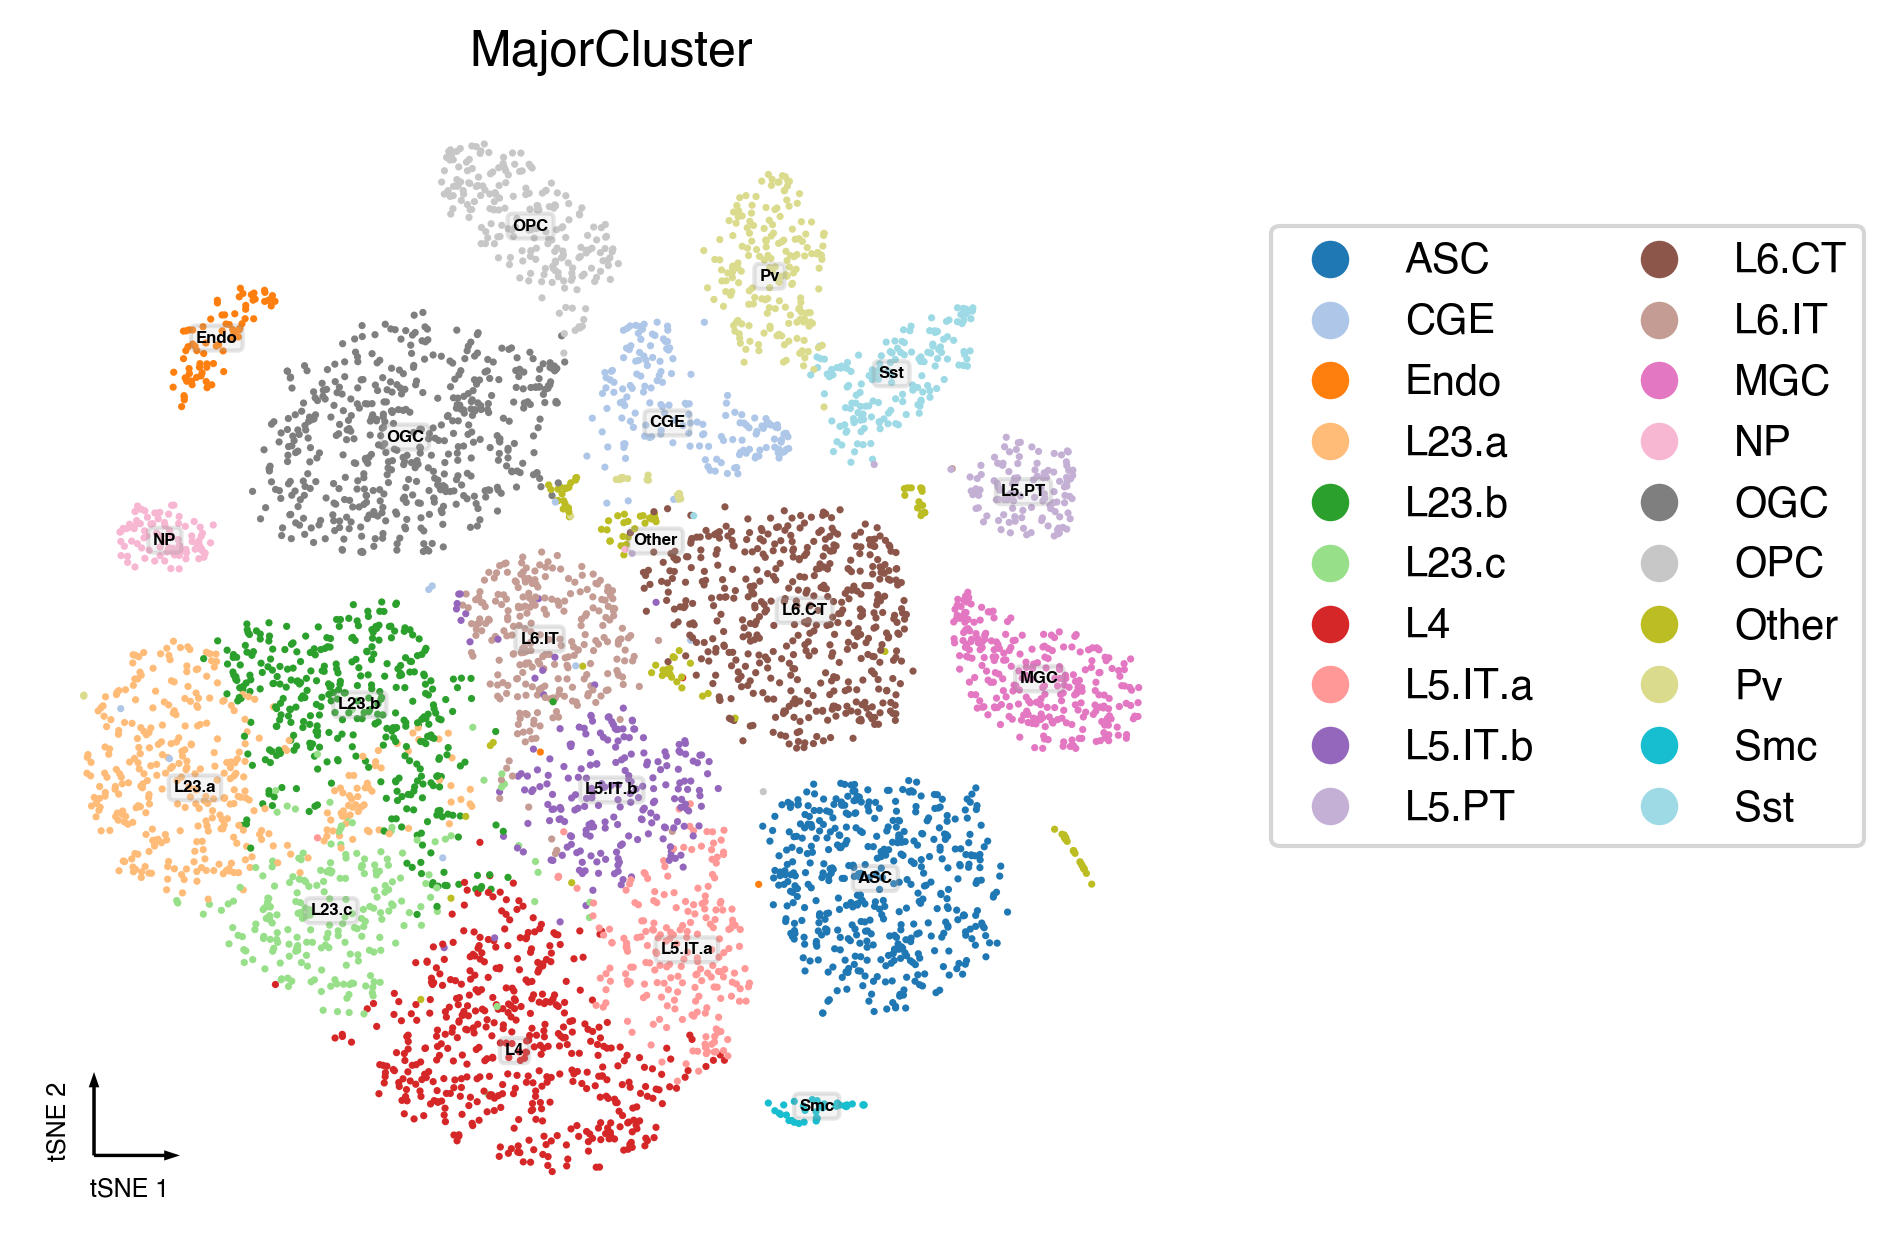

In [27]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
categorical_scatter(atac_clustering_results, 
                    ax, 
                    coord_base='tsne', 
                    hue='MajorCluster',
                    text_anno='MajorCluster',
                    palette='tab20',
                    show_legend=True,
                    scatter_kws=dict(s=3),
                    text_anno_kws=dict(fontsize=4),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)))
ax.set_title('MajorCluster')
fig.savefig('ATAC.MajorCluster.pdf')

In [29]:
atac_clustering_results.to_csv('ATAC.cell_tidy_data.csv.gz')
atac_clustering_results.to_msgpack('ATAC.cell_tidy_data.msg')